In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
def conc_frame(years):
    file_name_list = []
    for year in years:
        file_name_list.append('yob{}.txt'.format(str(year)))

    dir_path = f'{os.getcwd()}/input/'
    frame_list_per_year = []
    for i in file_name_list:
        frame_list_per_year.append(pd.read_csv(dir_path + i,
                                   names=['Name', 'Gender', 'Count'],
                                   index_col=None)
                                   )
    
    return frame_list_per_year
        
        
def task1():
    years = range(1900, 2001, 1)
    data_for_chart = pd.DataFrame(columns=['Ruth', 'Robert', 'year'])
    i = 0
    for year in conc_frame(years):

        data_per_year = [[year[year.Name == "Ruth"].Count.sum(),
                          year[year.Name == "Robert"].Count.sum(),
                          years[i]
                          ]]
        framed_data_per_year = pd.DataFrame(data_per_year, 
                                            columns=['Ruth', 'Robert', 'year'])
        data_for_chart = pd.concat([data_for_chart, framed_data_per_year])
        i += 1
    data_for_chart.plot.line(x='year')  
 

def task2():
    years = range(1900, 2001, 5)
    data_for_chart = pd.DataFrame(columns=['Ruth', 'Robert', 'year'])
    i = 0
    for year in conc_frame(years):

        data_per_year = [[year[year.Name == "Ruth"].Count.sum(),
                          year[year.Name == "Robert"].Count.sum(),
                          years[i]
                          ]]
        framed_data_per_year = pd.DataFrame(data_per_year, 
                                            columns=['Ruth', 'Robert', 'year'])
        data_for_chart = pd.concat([data_for_chart, framed_data_per_year])
        i += 1
    data_for_chart.plot.bar(x='year')
    
   
def task3():

    years = [1950]
    for year in conc_frame(years):
        top_ten_name = (year[year.Name.str.startswith("R")]
                        .groupby('Name').sum()
                        .sort_values(by='Count', ascending=False).head(10)
                        )
        top_ten_name.plot.pie(y='Count')
        
   
def task4():
    years = range(1900, 2001, 1)
    vowels = ['e','y','u','i','o','a']
    all_years = pd.concat(conc_frame(years)).groupby('Name').sum()
    all_years_dict = all_years.to_dict()
    data_for_chart=pd.DataFrame(columns=['Len', 'Count', 'Ratio'])
    
    for name in all_years_dict['Count']:
        n = 0
        for letter in name:
            if not letter.lower() in vowels:
                n += 1
        row_for_new_df = [[n, all_years_dict['Count'][name], 
                           n/all_years_dict['Count'][name]]]
        data_for_chart = pd.concat([data_for_chart,
                                   pd.DataFrame(row_for_new_df, 
                                    columns=['Len', 'Count', 'Ratio'])])

    data_for_chart.index = range(0,len(data_for_chart))
    data_for_chart['Len'] = data_for_chart['Len'].astype(np.int64)
    data_for_chart['Count'] = data_for_chart['Count'].astype(np.float64)
    data_for_chart.plot.scatter(x='Len', y='Count')
    

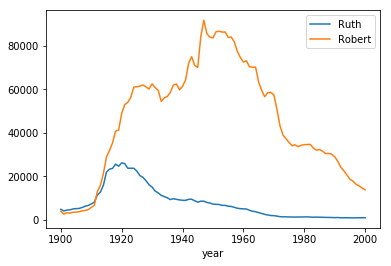

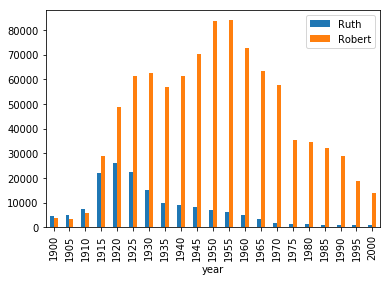

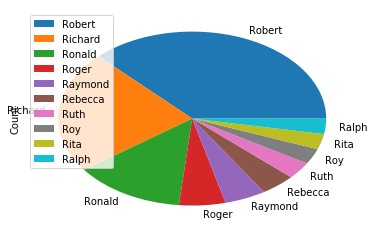

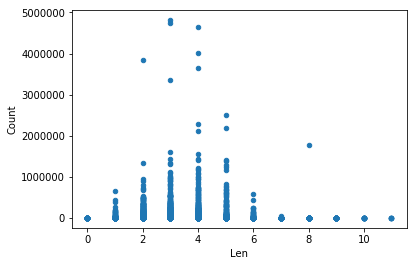

In [48]:
task1()
task2()
task3()
task4()